#  Import the Required Libraries

In [1]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import cv2
import random
from tensorflow.keras.optimizers import Adam,SGD
from sklearn.metrics import confusion_matrix, classification_report


# Loading the Image 

In [2]:
data_path = r"C:\Users\ragha\AIML Python\reduced bird image data\train\Common-Kingfisher\Common-Kingfisher_765.jpg"

In [3]:
image = cv2.imread(data_path) 
#cv2.imread() method loads an image from the path name

In [4]:
cv2.imread(data_path)
#loads image into 3-D that is for RGB

array([[[145, 174, 195],
        [145, 174, 195],
        [145, 174, 195],
        ...,
        [150, 181, 204],
        [150, 181, 204],
        [150, 181, 204]],

       [[145, 174, 195],
        [145, 174, 195],
        [145, 174, 195],
        ...,
        [150, 181, 204],
        [150, 181, 204],
        [150, 181, 204]],

       [[145, 174, 195],
        [145, 174, 195],
        [145, 174, 195],
        ...,
        [150, 181, 204],
        [150, 181, 204],
        [150, 181, 204]],

       ...,

       [[155, 184, 205],
        [154, 183, 204],
        [154, 183, 204],
        ...,
        [142, 173, 198],
        [142, 173, 198],
        [142, 173, 198]],

       [[152, 181, 202],
        [153, 182, 203],
        [155, 184, 205],
        ...,
        [141, 172, 197],
        [141, 172, 197],
        [141, 172, 197]],

       [[152, 181, 202],
        [153, 182, 203],
        [155, 184, 205],
        ...,
        [141, 172, 197],
        [141, 172, 197],
        [141, 172, 197]]

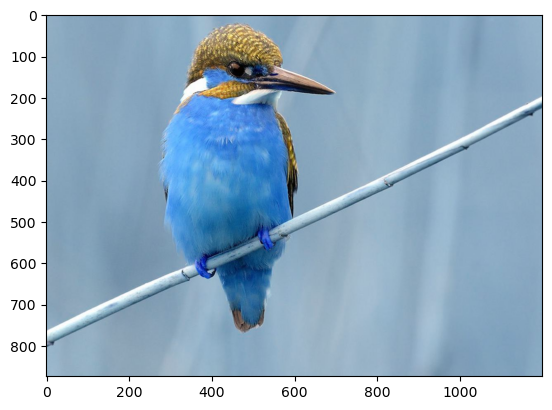

In [5]:
plt.imshow(image)

In [6]:
image.shape
#(height of Image , Wiidth of Image  )

(874, 1200, 3)

# Training and Validation Datasets

In [7]:
train = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)

In [61]:
BATCH_SIZE = 34

In [62]:
train_dataset = train.flow_from_directory(r'C:\Users\ragha\AIML Python\reduced bird image data\train',
                                          target_size=(256,256),
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          batch_size=BATCH_SIZE,
                                          shuffle=True)


valid_dataset = valid.flow_from_directory(r'C:\Users\ragha\AIML Python\reduced bird image data\valid',
                                          target_size=(256,256),
                                          color_mode='rgb',
                                          class_mode='categorical',
                                           batch_size=BATCH_SIZE,
                                          shuffle=True)

"""
The ImageDataGenerator class is very useful in image classification. 
There are several ways to use this generator, depending on the method we use, 
here we will focus on flow_from_directory takes a path to the directory containing images sorted in sub directories and 
image augmentation parameters.

"""



Found 5100 images belonging to 8 classes.
Found 1500 images belonging to 8 classes.


'\nThe ImageDataGenerator class is very useful in image classification. \nThere are several ways to use this generator, depending on the method we use, \nhere we will focus on flow_from_directory takes a path to the directory containing images sorted in sub directories and \nimage augmentation parameters.\n\n'

# Get the Label Mappings

In [12]:
labels = {value: key for key, value in train_dataset.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Asian-Green-Bee-Eater
1 : Brown-Headed-Barbet
2 : Common-Kingfisher
3 : Coppersmith-Barbet
4 : Hoopoe
5 : Indian-Peacock
6 : Indian-Roller
7 : Rufous-Treepie


#  Plotting Sample Training Images

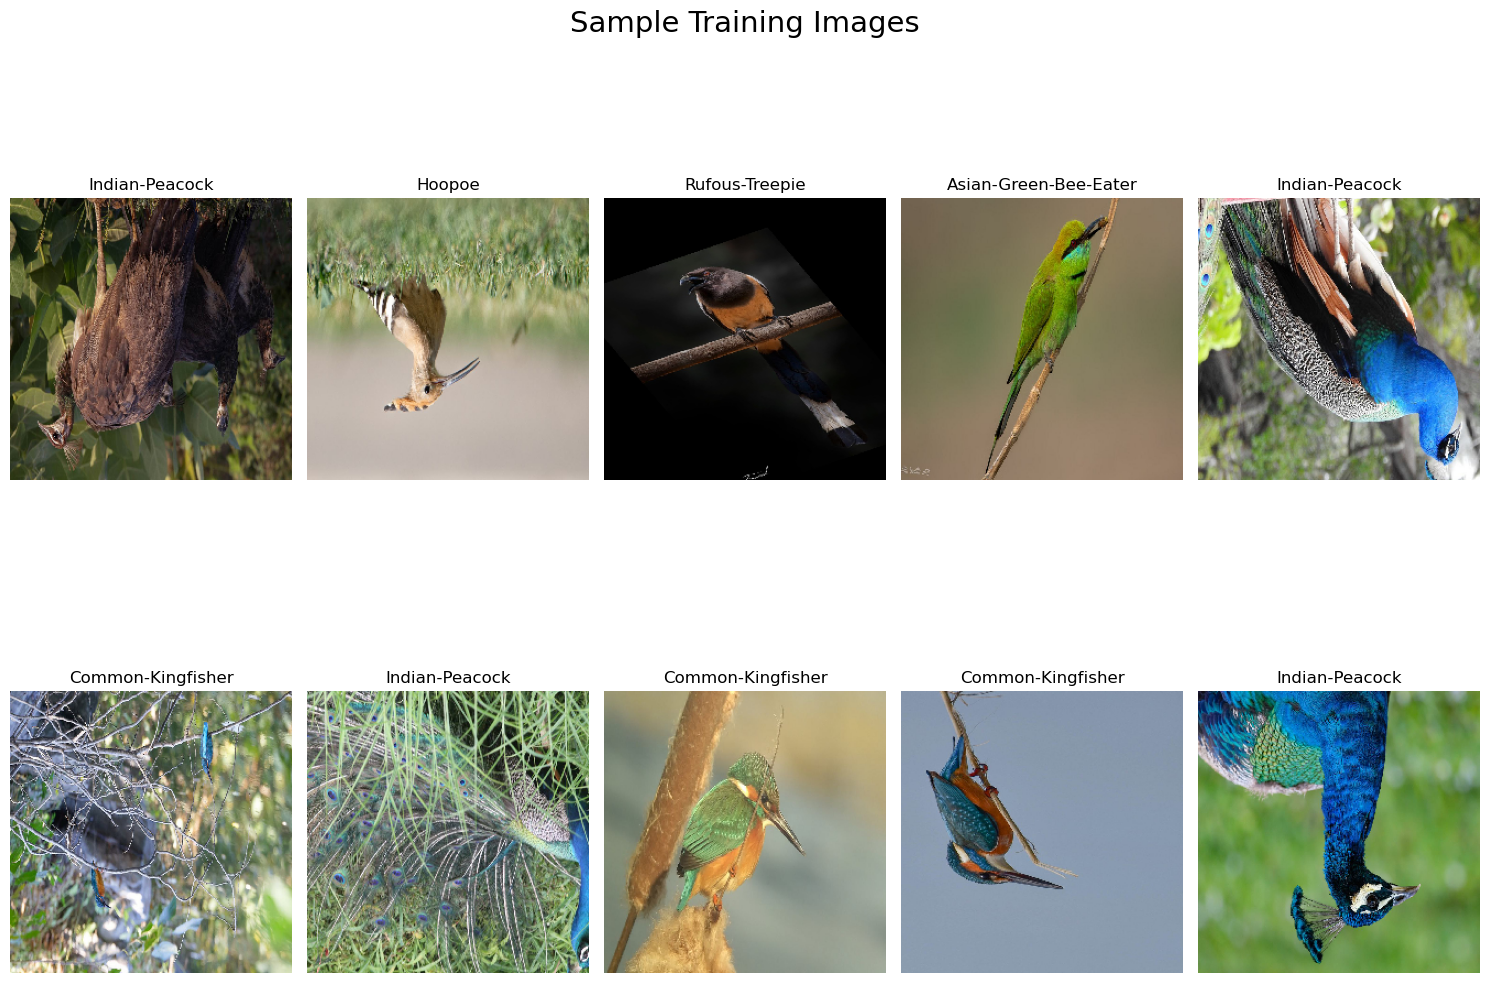

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()


# Training a CNN Model

# We have a 256x256 RGB ( 3x3 kernel size) image.¶
# We create 128 filters with 3x3 kernel size which shift 1 pixel at a time. The output has the same height'width dimension (i.e. 256x256) as the input and is activated by ReLU. Then, a maximum pooling with filters=(2,2) and stride=(2,2) is applied to a 256x256 output from previous Conv2D to downsample # 

# Experiment 1 : STOCHASTIC GRADIENT DESCENT
# Batch Size = 1
# Model 1

# Let’s create the architecture for our CNN model. The architecture is simple. It has three Convolutional layers and two fully connected layers.



In [35]:
model = tf.keras.models.Sequential([                                    
                                    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu',input_shape =(256,256,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                
                                    ##
                                    tf.keras.layers.Conv2D(64,(3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    ##
                                    tf.keras.layers.Conv2D(32,(3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    ##
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),    
                                    tf.keras.layers.Dense(8, activation='softmax')
                                  ])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 128)     0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 127, 127, 128)     512       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                      

In [37]:
optimizer = Adam(learning_rate=0.001)

In [38]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

In [40]:
model_fit = model.fit(
    train_dataset,
    epochs = 10 ,
    batch_size = 1,
    validation_data=valid_dataset)

Epoch 1/10
5100/5100 [==============================] - 852s 167ms/step - loss: 2.0569 - accuracy: 0.1708 - val_loss: 18.8793 - val_accuracy: 0.2420
Epoch 2/10
5100/5100 [==============================] - 845s 166ms/step - loss: 2.0044 - accuracy: 0.2098 - val_loss: 16.5226 - val_accuracy: 0.2780
Epoch 3/10
5100/5100 [==============================] - 851s 167ms/step - loss: 1.9263 - accuracy: 0.2231 - val_loss: 12.7601 - val_accuracy: 0.2773
Epoch 4/10
5100/5100 [==============================] - 864s 169ms/step - loss: 1.8893 - accuracy: 0.2275 - val_loss: 6.5716 - val_accuracy: 0.2847
Epoch 5/10
5100/5100 [==============================] - 869s 170ms/step - loss: 1.8814 - accuracy: 0.2286 - val_loss: 12.3329 - val_accuracy: 0.2753
Epoch 6/10
5100/5100 [==============================] - 877s 172ms/step - loss: 1.8793 - accuracy: 0.2394 - val_loss: 20.5774 - val_accuracy: 0.2793
Epoch 7/10
5100/5100 [==============================] - 866s 170ms/step - loss: 1.8396 - accuracy: 0.2412 -

In [41]:
model_fit.history

{'loss': [2.0568881034851074,
  2.004366874694824,
  1.9262986183166504,
  1.889298439025879,
  1.8813776969909668,
  1.879347801208496,
  1.8395916223526,
  1.8505151271820068,
  1.8082141876220703,
  1.886619210243225],
 'accuracy': [0.17078430950641632,
  0.20980392396450043,
  0.2231372594833374,
  0.22745098173618317,
  0.22862745821475983,
  0.23941177129745483,
  0.24117647111415863,
  0.2401960790157318,
  0.2454901933670044,
  0.24274510145187378],
 'val_loss': [18.87932777404785,
  16.52264404296875,
  12.760092735290527,
  6.571611404418945,
  12.332890510559082,
  20.577449798583984,
  24.05507469177246,
  9.6119384765625,
  13.70605754852295,
  20.318269729614258],
 'val_accuracy': [0.24199999868869781,
  0.27799999713897705,
  0.2773333191871643,
  0.28466665744781494,
  0.27533334493637085,
  0.27933332324028015,
  0.2680000066757202,
  0.28466665744781494,
  0.2826666533946991,
  0.28066667914390564]}

# Plotting Training Accuracy  VS  Validatiion Accuracy

In [24]:
def acc_curve(history):
    
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title('Training and Validation Accuracy', fontsize=20)
    plt.xlabel('Epochs', fontsize = 15)
    plt.ylabel('Accuracy', fontsize = 15)
    plt.legend()
    plt.show()



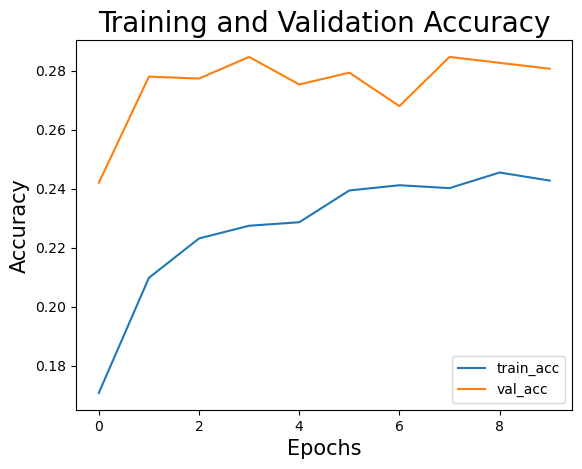

In [42]:
acc_curve(model_fit)

# Plotting Training Loss  VS  Validatiion Loss

In [25]:
def loss_curve(history):  
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Training and Validation Loss', fontsize=20)
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.legend()
    plt.show()

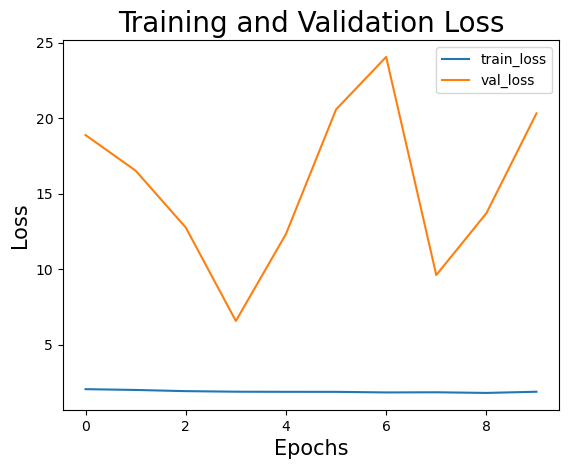

In [43]:
loss_curve(model_fit)

# Experiment 2: Mini Batch Gradient Descent
# batch_size = 34
# Using some data (more than one sample but less than entire dataset)
# Model 2

In [63]:
model2 = tf.keras.models.Sequential([                                    
                                    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu',input_shape =(256,256,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                
                                    ##
                                    tf.keras.layers.Conv2D(64,(3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    ##
                                    tf.keras.layers.Conv2D(32,(3, 3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    ##
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),    
                                    tf.keras.layers.Dense(8, activation='softmax')
                                  ])

In [64]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 128)     0         
 ng2D)                                                           
                                                                 
 batch_normalization_15 (Ba  (None, 127, 127, 128)     512       
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      73792     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                      

In [65]:
optimizer = Adam(learning_rate=0.001)

In [66]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])

In [67]:
model2_fit = model2.fit(
    train_dataset,
    epochs = 10,
    batch_size = 34 ,
    validation_data=valid_dataset)

Epoch 1/10
150/150 [==============================] - 370s 2s/step - loss: 7.5438 - accuracy: 0.3704 - val_loss: 6.1856 - val_accuracy: 0.1053
Epoch 2/10
150/150 [==============================] - 369s 2s/step - loss: 2.6936 - accuracy: 0.5280 - val_loss: 9.7825 - val_accuracy: 0.1973
Epoch 3/10
150/150 [==============================] - 368s 2s/step - loss: 1.2989 - accuracy: 0.6267 - val_loss: 1.8677 - val_accuracy: 0.3433
Epoch 4/10
150/150 [==============================] - 369s 2s/step - loss: 0.8165 - accuracy: 0.7359 - val_loss: 1.6311 - val_accuracy: 0.5320
Epoch 5/10
150/150 [==============================] - 369s 2s/step - loss: 0.6691 - accuracy: 0.7802 - val_loss: 1.7864 - val_accuracy: 0.5900
Epoch 6/10
150/150 [==============================] - 367s 2s/step - loss: 0.4908 - accuracy: 0.8341 - val_loss: 1.7801 - val_accuracy: 0.6213
Epoch 7/10
150/150 [==============================] - 367s 2s/step - loss: 0.4846 - accuracy: 0.8412 - val_loss: 2.2733 - val_accuracy: 0.5367

In [70]:
model2_fit.history

{'loss': [7.543827533721924,
  2.6935853958129883,
  1.2989445924758911,
  0.8164703845977783,
  0.6691080927848816,
  0.4908428192138672,
  0.4846170246601105,
  0.3756808936595917,
  0.3403386175632477,
  0.30252203345298767],
 'accuracy': [0.3703921437263489,
  0.5280392169952393,
  0.6266666650772095,
  0.7358823418617249,
  0.7801960706710815,
  0.8341176509857178,
  0.841176450252533,
  0.8749019503593445,
  0.8890196084976196,
  0.9003921747207642],
 'val_loss': [6.1856231689453125,
  9.782462120056152,
  1.8676767349243164,
  1.6310862302780151,
  1.786400556564331,
  1.7800902128219604,
  2.273264169692993,
  1.9912046194076538,
  1.7402656078338623,
  2.0036211013793945],
 'val_accuracy': [0.10533333569765091,
  0.19733333587646484,
  0.34333333373069763,
  0.5320000052452087,
  0.5899999737739563,
  0.6213333606719971,
  0.5366666913032532,
  0.6399999856948853,
  0.6513333320617676,
  0.6286666393280029]}

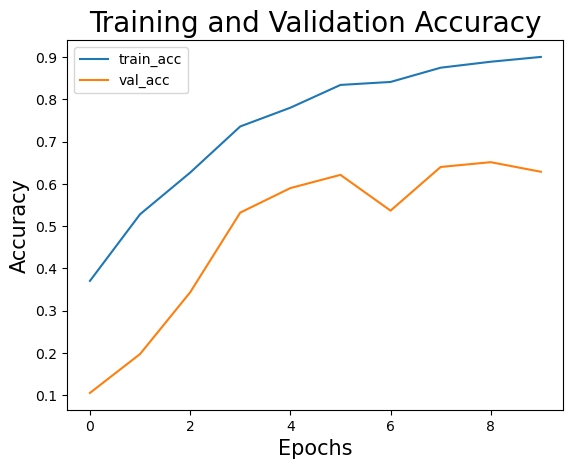

In [71]:
acc_curve(model2_fit)

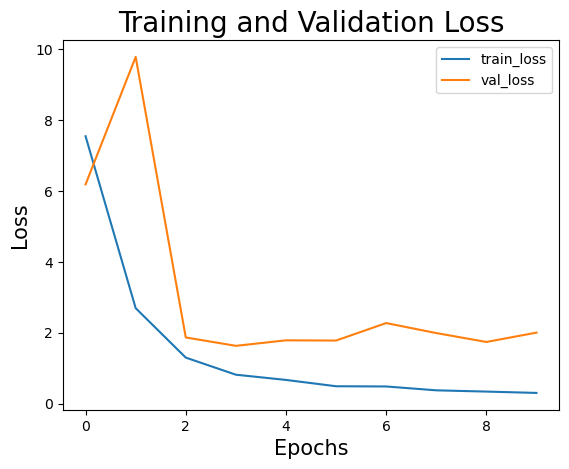

In [72]:
loss_curve(model2_fit)

# Testing the Model on Test Set

In [73]:
test = r'C:\Users\ragha\AIML Python\reduced bird image data\valid'

In [75]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_dataset = test_datagen.flow_from_directory(test,
                                          target_size=(256,256),
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          batch_size=50,
                                          shuffle=True)

Found 1500 images belonging to 8 classes.


# Model Prediction on the Test Dataset

In [96]:
predictions = model2.predict(test_dataset)

30/30 [==============================] - 22s 737ms/step


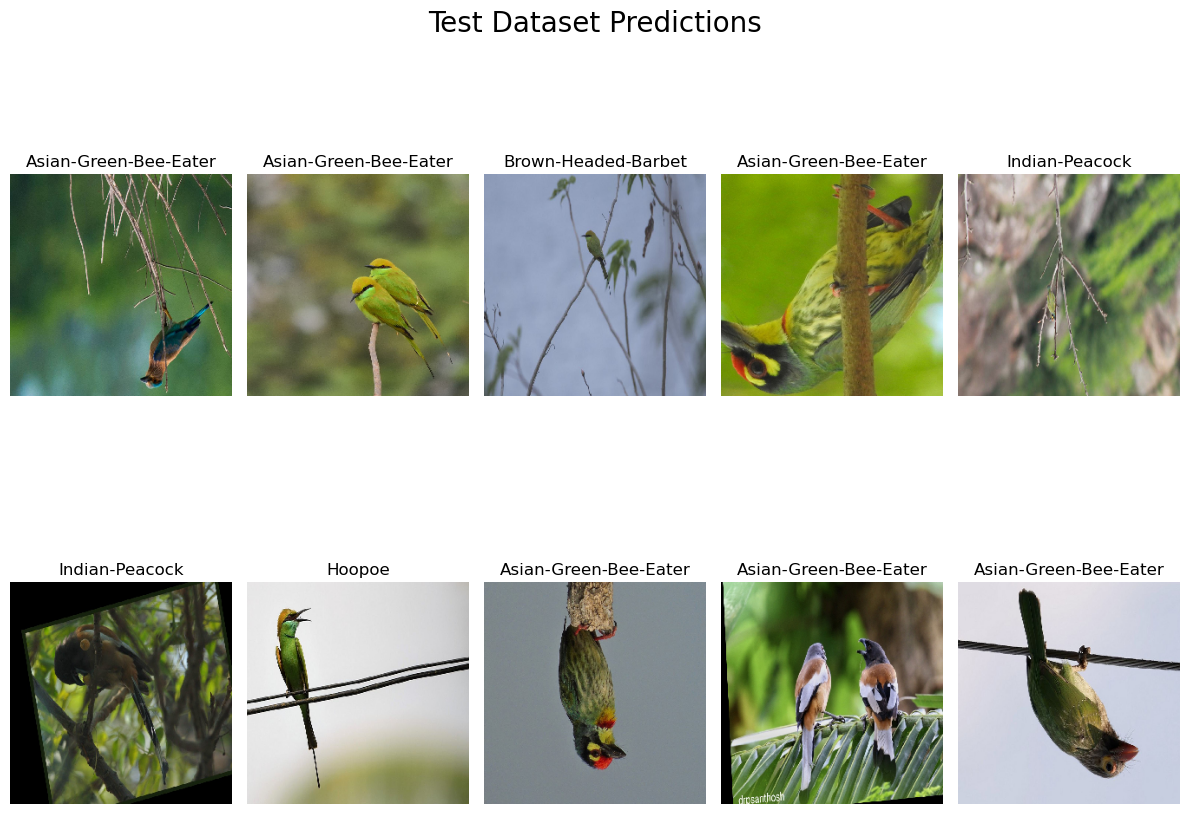

In [98]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_dataset[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [80]:
test_loss, test_accuracy = model2.evaluate(test_dataset , batch_size = 200)

30/30 [==============================] - 23s 754ms/step - loss: 2.0036 - accuracy: 0.6287


In [81]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     2.0036208629608154
Test Accuracy: 0.6286666393280029


# Plotting the Classification Metrics

In [82]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_dataset.classes

In [83]:
import seaborn as sns

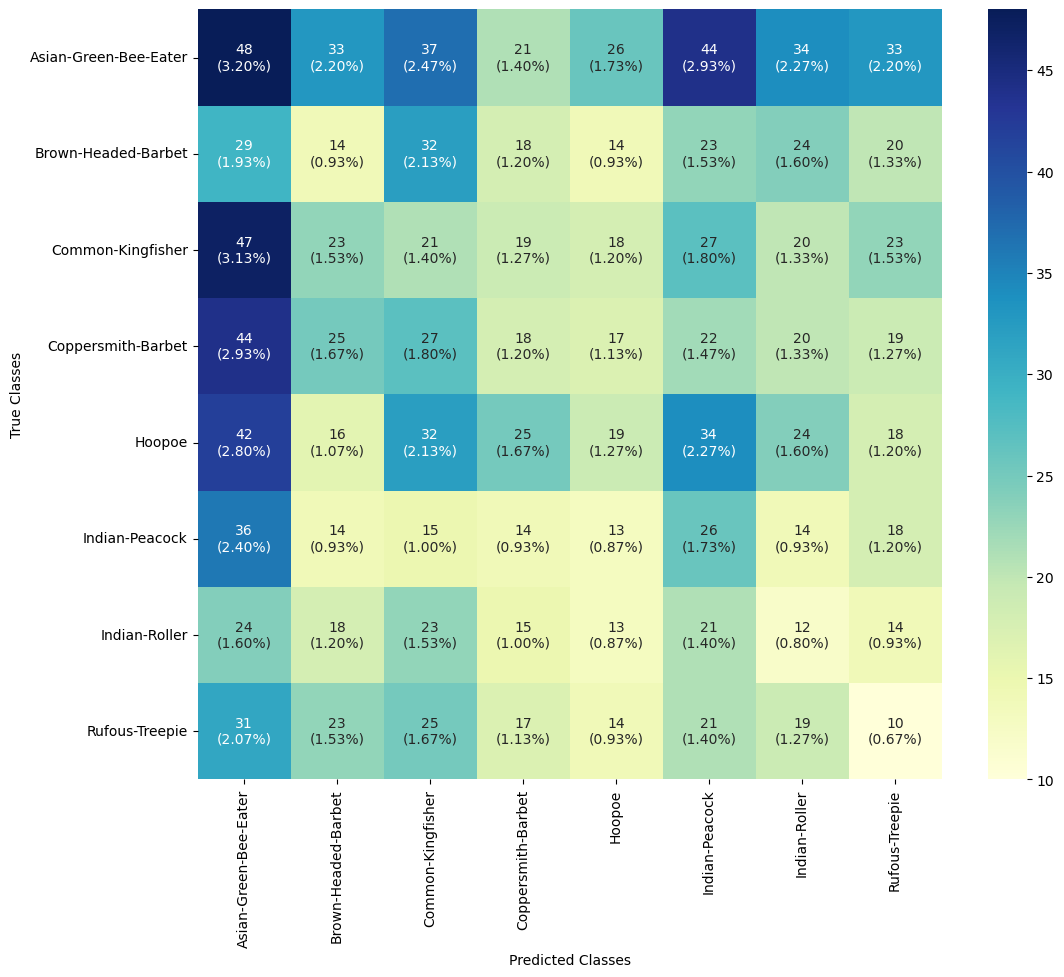

In [84]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(8, 8)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

# Wrong predictions

In [85]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [86]:
test_images = test_dataset.filenames
test_img = np.asarray(test_images)[errors]

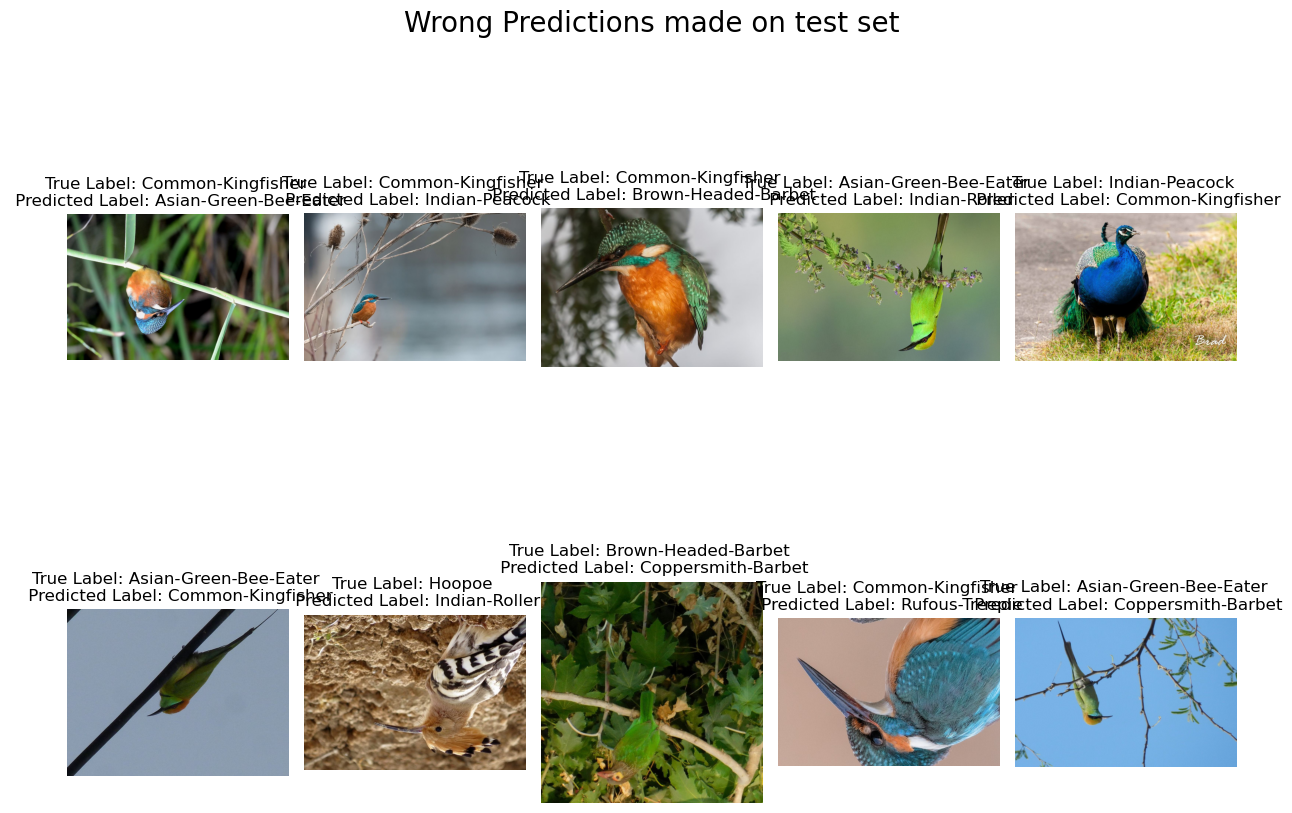

In [92]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

In [ ]:
predictions = model2.predict(test_dataset)